In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
def download_and_read_csv(dataset_link):
    """
    Downloads a dataset from Kaggle using the provided dataset link and creates a DataFrame from the downloaded CSV file.

    Args:
    - dataset_link (str): The Kaggle dataset link.

    Returns:
    - df (DataFrame): The DataFrame created from the downloaded CSV file.
    """
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_link, path=".", unzip=True)
    files = os.listdir()

    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file)
            return df

In [3]:
df_mental_health = download_and_read_csv('shariful07/student-mental-health')
df = df_mental_health.copy()

In [4]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.00,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.00,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.00,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.00,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.00,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


C:\Users\kyana\AppData\Local\Temp\ipykernel_5820\2957447325.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['What is your CGPA?'], kde=True, bins=1, palette='Blues')


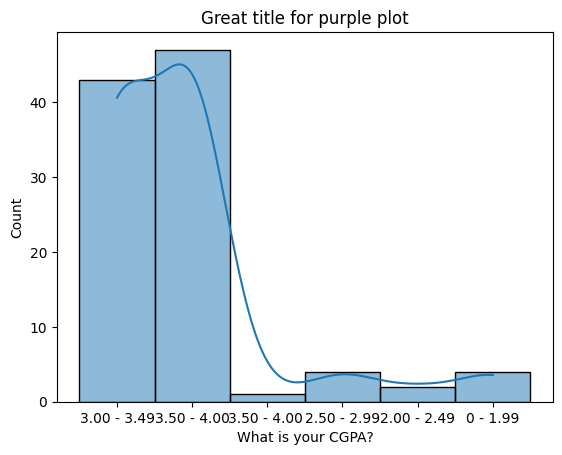

In [5]:
# Exercise 1 : Visualizing The Distribution Of CGPA
sns.histplot(df['What is your CGPA?'], kde=True, bins=1, palette='Blues')
plt.title('Great title for purple plot')
plt.show()

C:\Users\kyana\AppData\Local\Temp\ipykernel_5820\583975526.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2.replace({'Yes': 1, 'No': 0}, inplace = True)


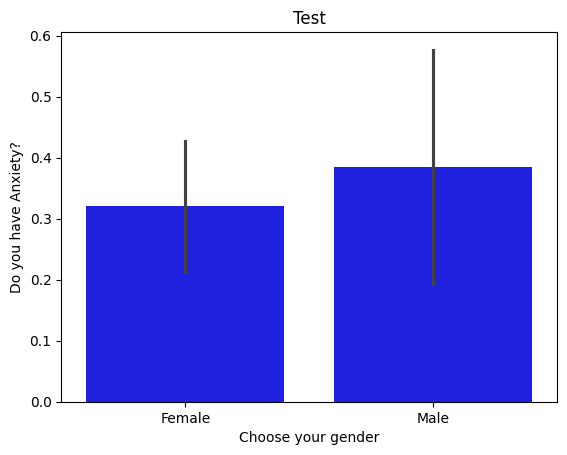

In [6]:
# Exercise 2: Comparing Anxiety Levels Across Different
df_2 = df.copy()
df_2.replace({'Yes': 1, 'No': 0}, inplace = True)
sns.barplot(x='Choose your gender', y='Do you have Anxiety?', data=df_2, color='blue')
plt.title('Test')
plt.show()

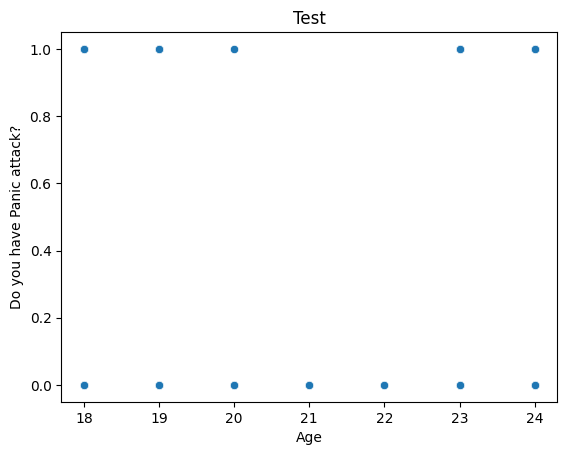

In [7]:
# Exercise 3: Exploring The Relationship Between Age And Panic Attacks
sns.scatterplot(x='Age',y='Do you have Panic attack?', data = df_2)
plt.title('Test')
plt.show()

In [8]:
# Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot
# i also added age difference. 
df_2.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [9]:
columns_4 = ['Choose your gender', 'Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
df_4 = df_2[columns_4].copy()

In [10]:
df_4.head()

,Choose your gender,Age,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,Female,18.00,3.00 - 3.49,1,0,1
1,Male,21.00,3.00 - 3.49,0,1,0
2,Male,19.00,3.00 - 3.49,1,1,1
3,Female,22.00,3.00 - 3.49,1,0,0
4,Male,23.00,3.00 - 3.49,0,0,0


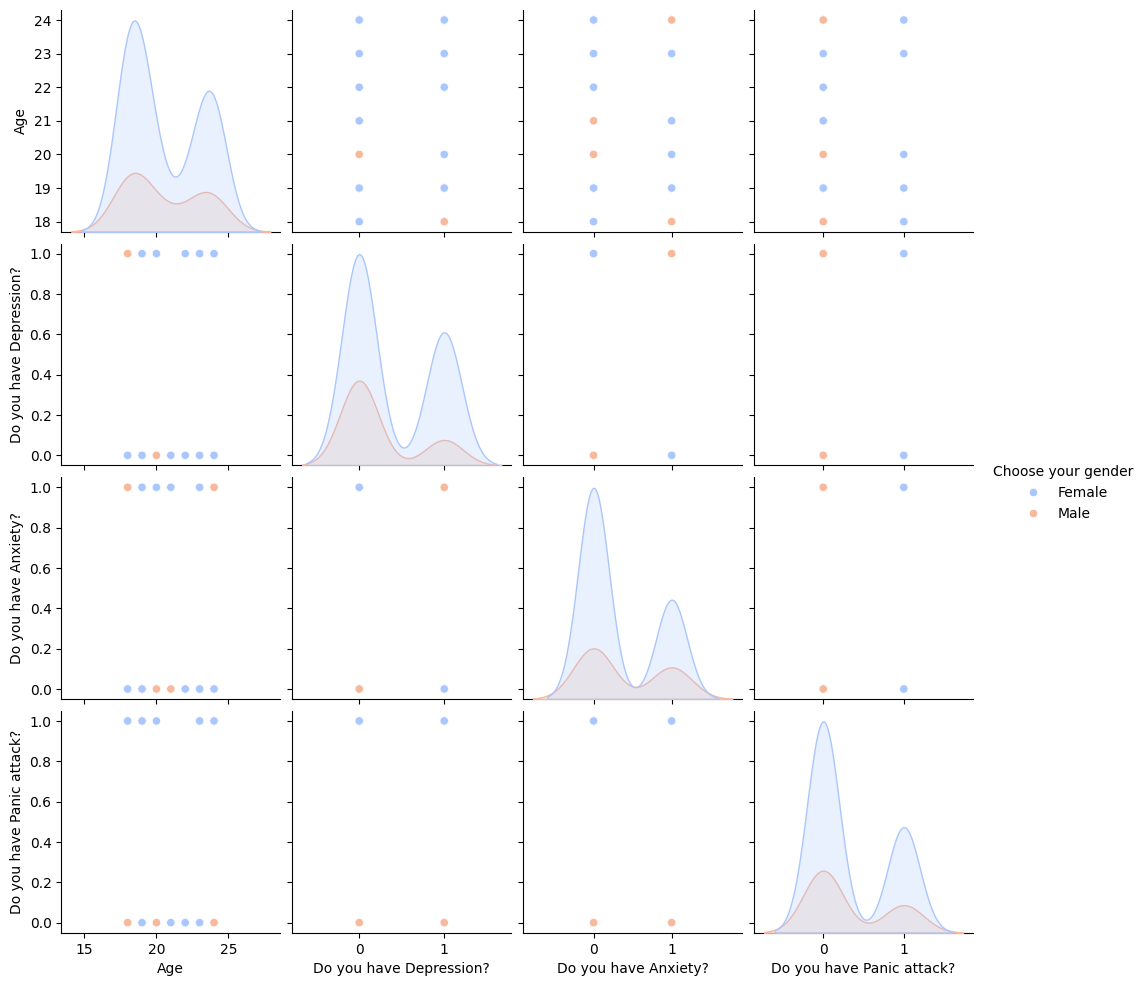

In [11]:
sns.pairplot(df_4, hue='Choose your gender', palette='coolwarm')

In [12]:
# Exercise 5: Creating A Heatmap To Visualize Correlations

In [20]:
columns_5 = ['Age', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
df_5 = df_4[columns_5].copy()

<Axes: >

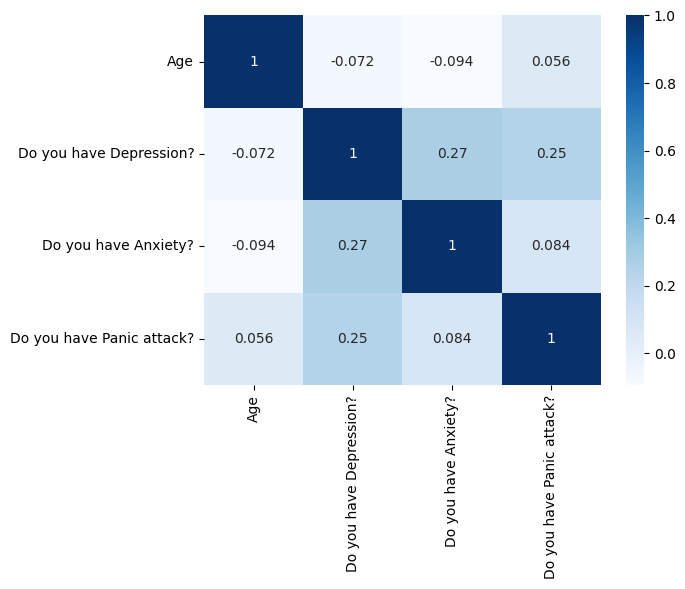

In [23]:
ex_5_mix = df_5.corr()
sns.heatmap(ex_5_mix, annot=True, cmap='Blues')

In [24]:
# Exercise 6: Analyzing Distributions And Relationships Using FacetGrid
df_2.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.00,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.00,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.00,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.00,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.00,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


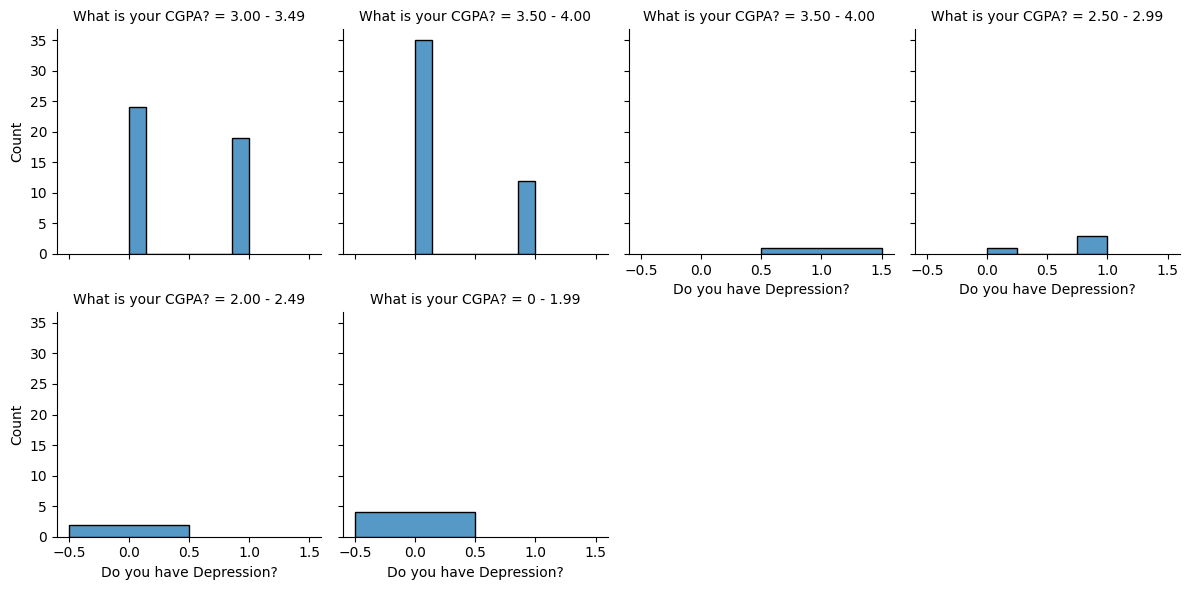

In [25]:
g = sns.FacetGrid(df_2, col='What is your CGPA?', col_wrap=4)
g.map(sns.histplot, 'Do you have Depression?')